In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as ss
import matplotlib.pyplot as plt
plt.style.use("ggplot")

In [240]:
from sklearn.linear_model import LinearRegression

In [3]:
df = pd.read_csv("cleaned.csv")

In [14]:
total_transactions = df.groupby("block_number").apply(lambda x:x.n_transaction.iloc[0])

In [16]:
symbol_counts.sum()

248811

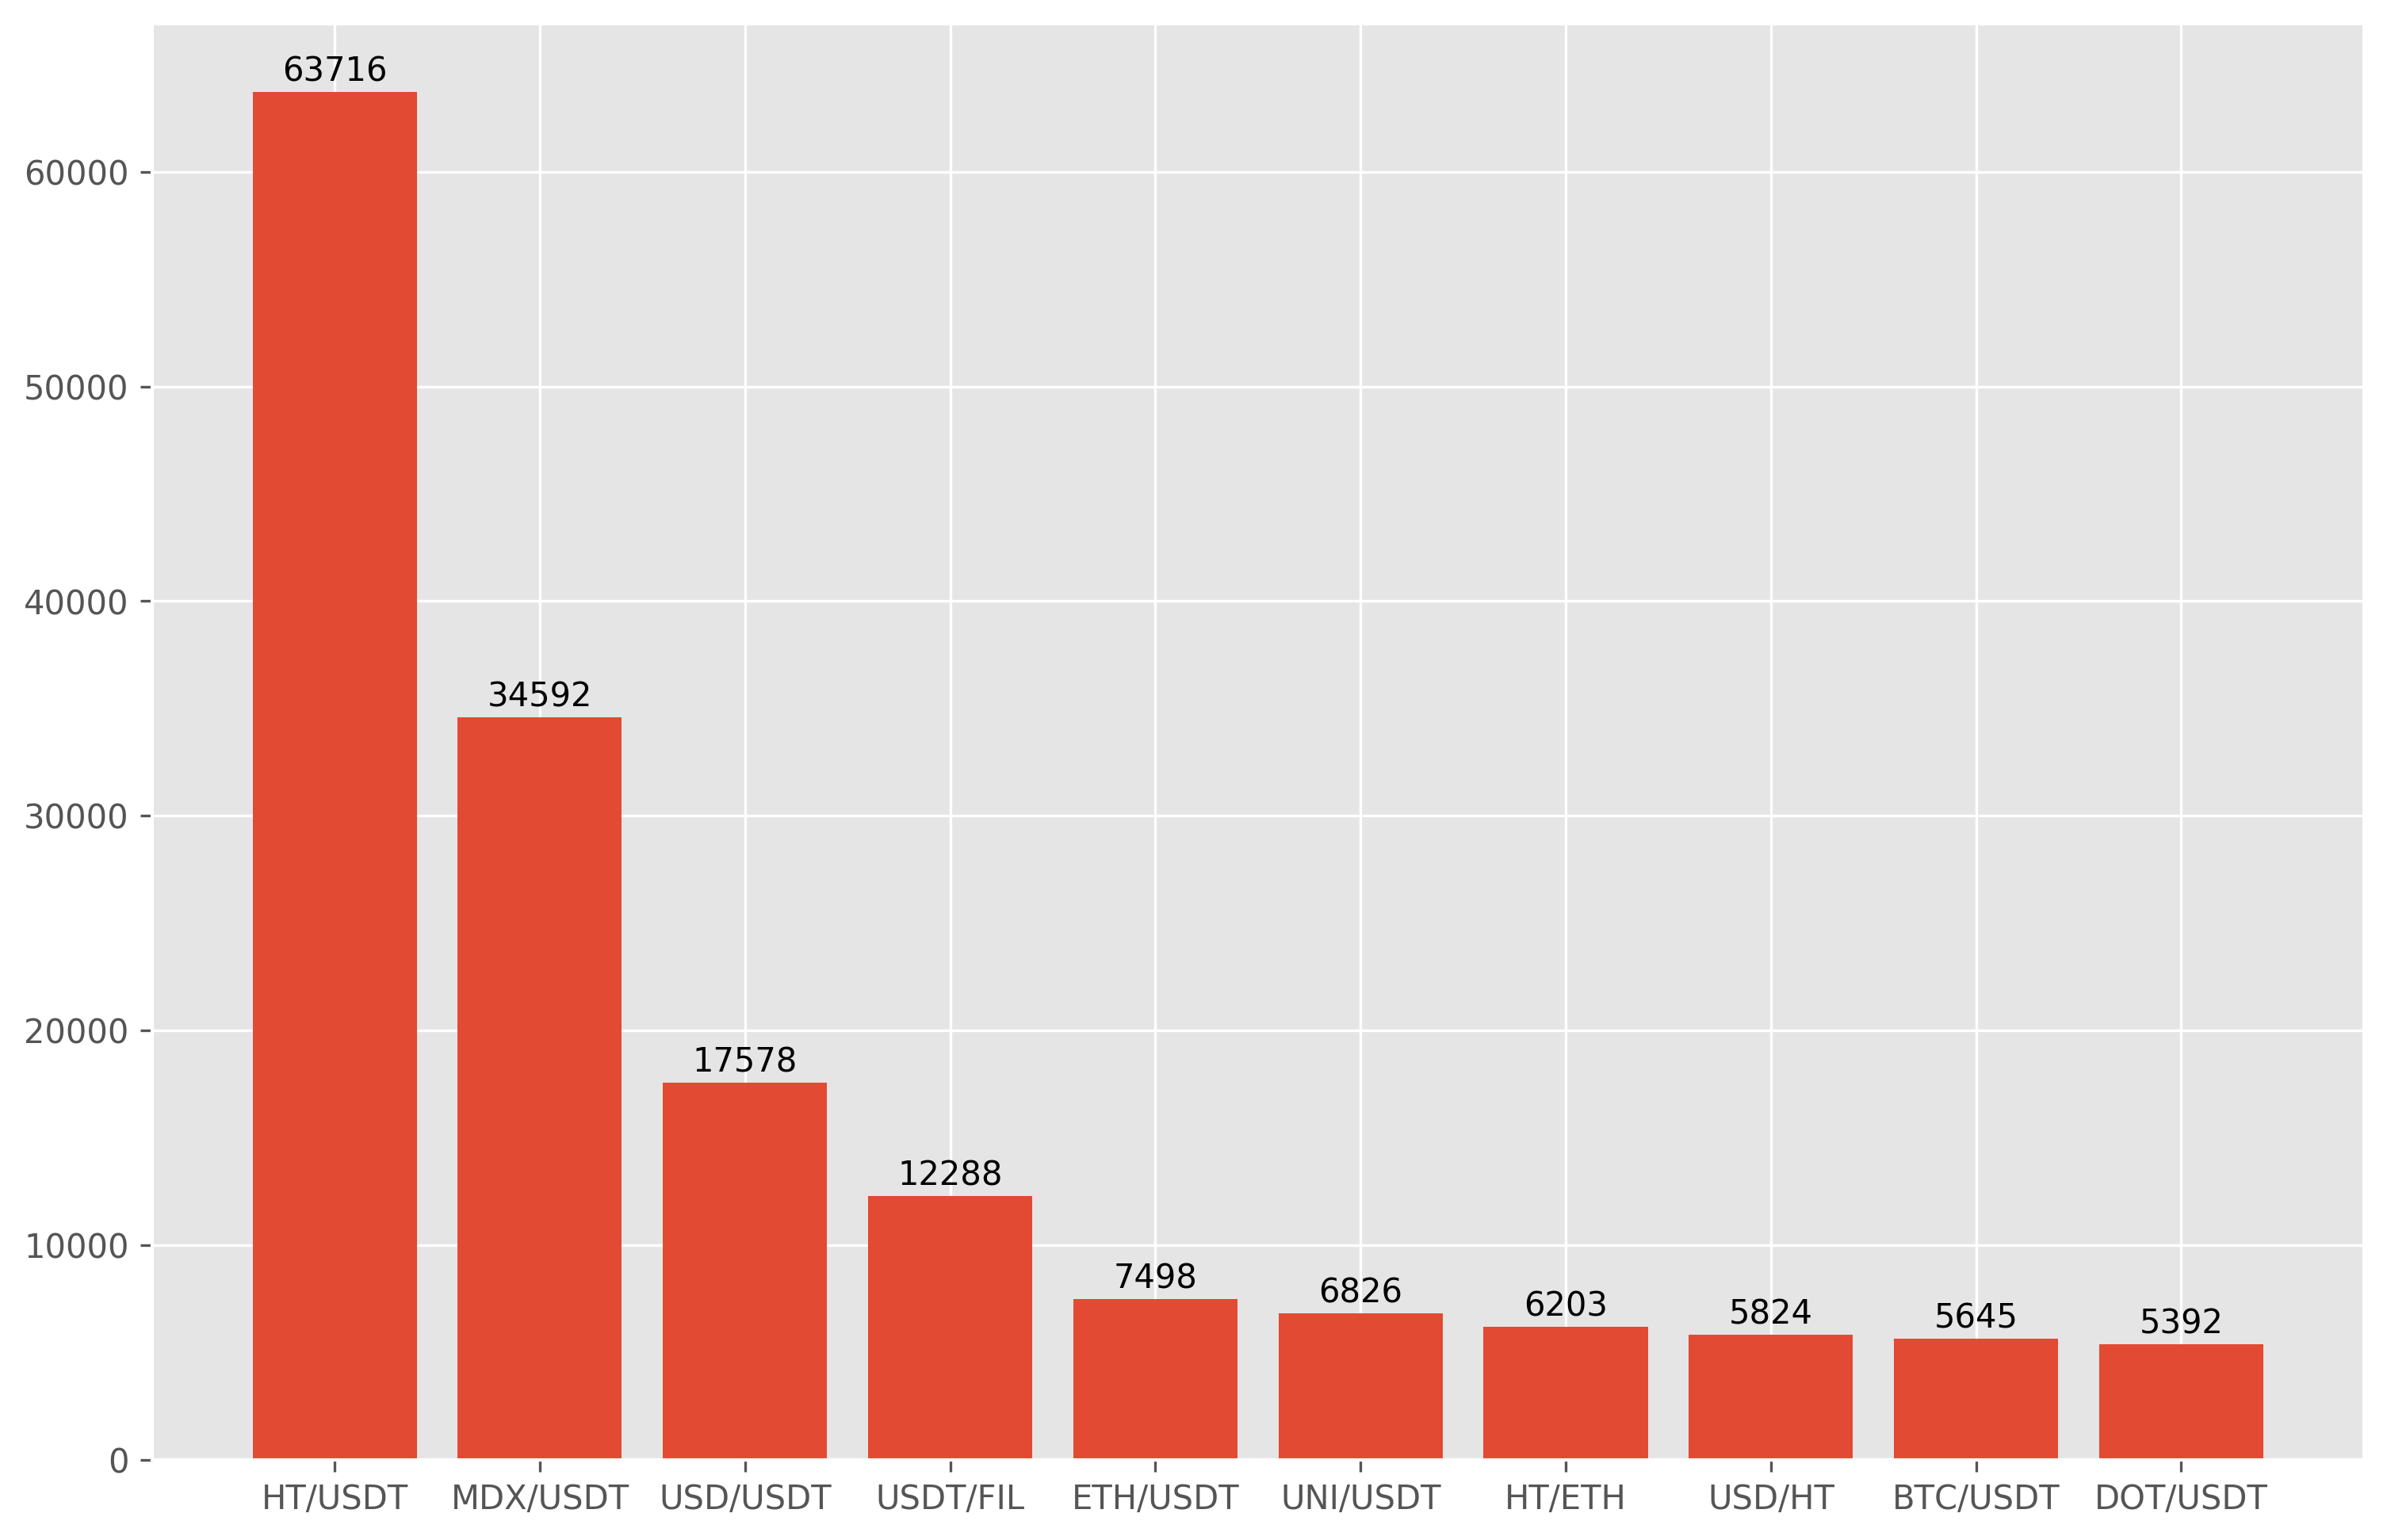

In [54]:
symbol_counts = df.symbol.value_counts()
plt.figure(figsize=(8*1.5,8), dpi=300)
top_n = 10
X = np.arange(top_n)+1
symbols = symbol_counts.index[:top_n]
n_transactions = symbol_counts.iloc[:top_n].values
plt.bar(X, n_transactions)
plt.xticks(X, symbols)
for x, value in zip(X, n_transactions):
    plt.text(x, value+500, value, ha='center')
plt.savefig("MDEX中交易数量排名前10币对.jpg", bbox_inches="tight")

In [107]:
des = [ss.describe(df.gas_price)]
for symbol in symbol_counts.index[:-1]:
    symbol_df = df[df.symbol==symbol]
    des.append(ss.describe(symbol_df.gas_price))
des = pd.DataFrame(des, index=["Total"]+symbol_counts.index[:-1].tolist())

In [ ]:
des.to_csv("76个币对GAS价格描述.csv")

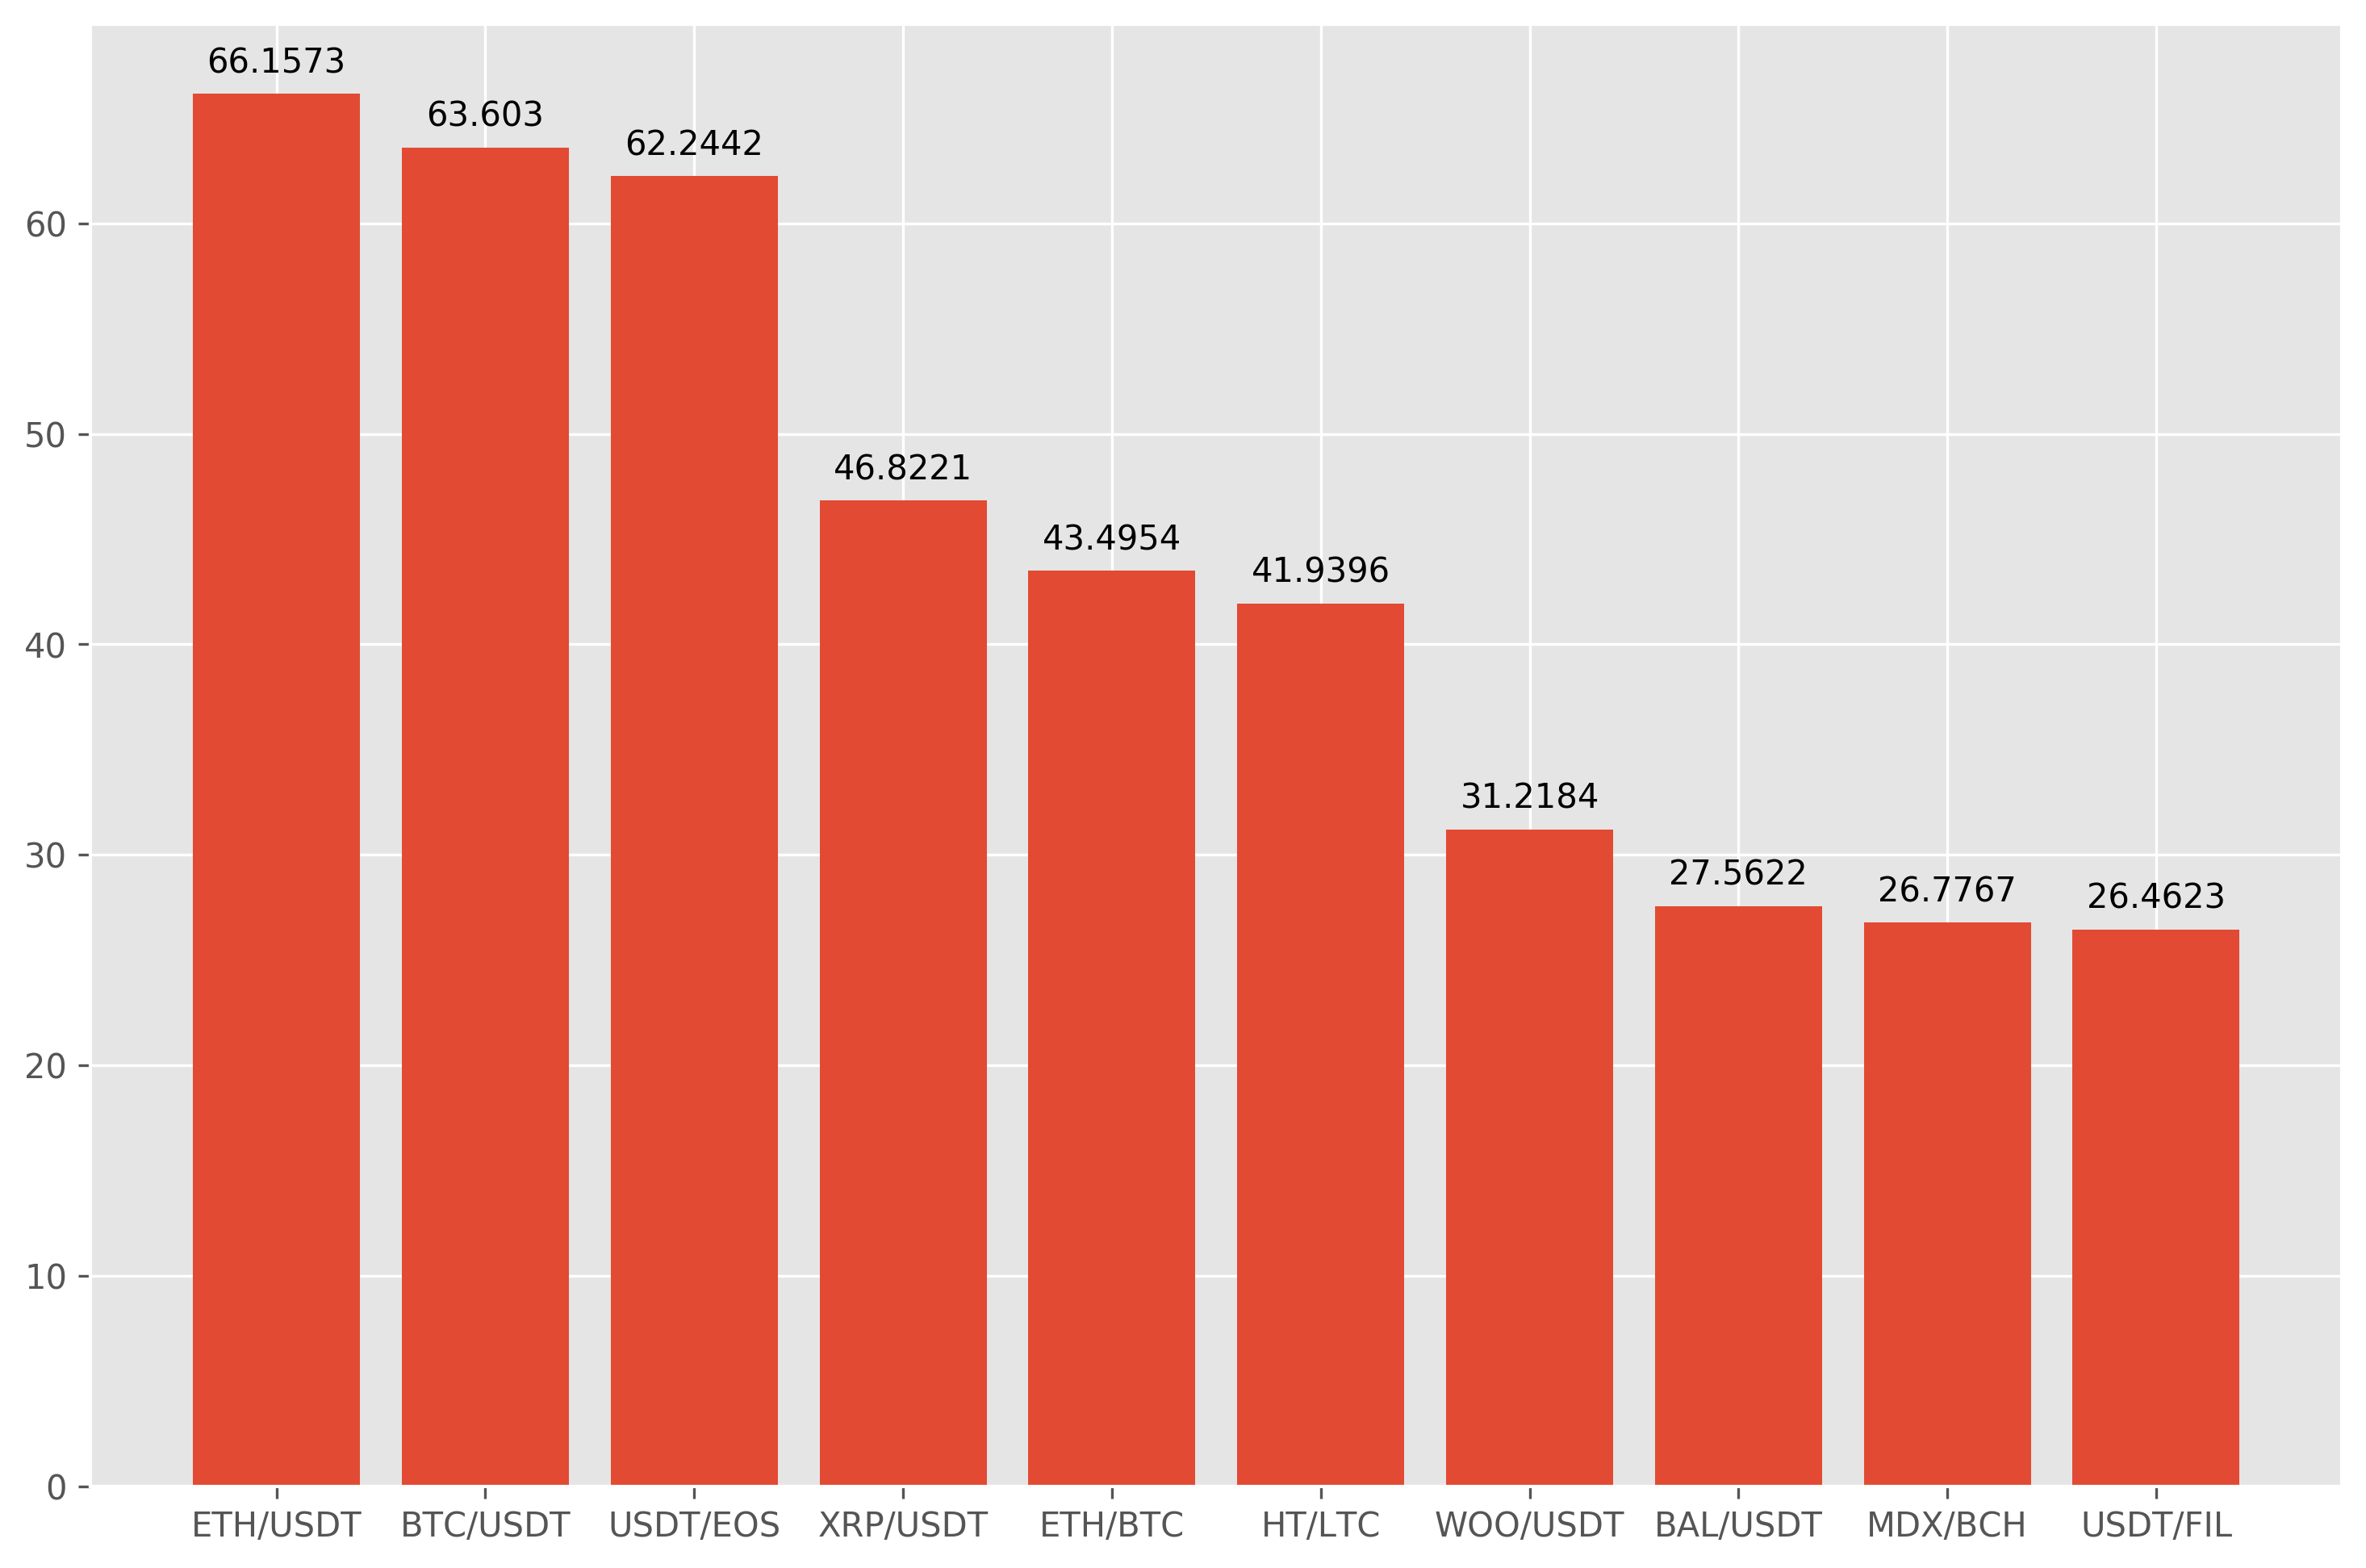

In [109]:
tmp = des.iloc[1:].sort_values("mean", ascending=False)
plt.figure(figsize=(12,8), dpi=300)
top_n = 10
X = np.arange(top_n)+1
symbols = tmp.index[:top_n]
n_transactions = tmp["mean"].iloc[:top_n].values
plt.bar(X, n_transactions)
plt.xticks(X, symbols)
for x, value in zip(X, n_transactions):
    plt.text(x, value+1, round(value, 4), ha='center')
plt.savefig("MDEX中GAS价格均值排名前10币对.jpg", bbox_inches="tight")

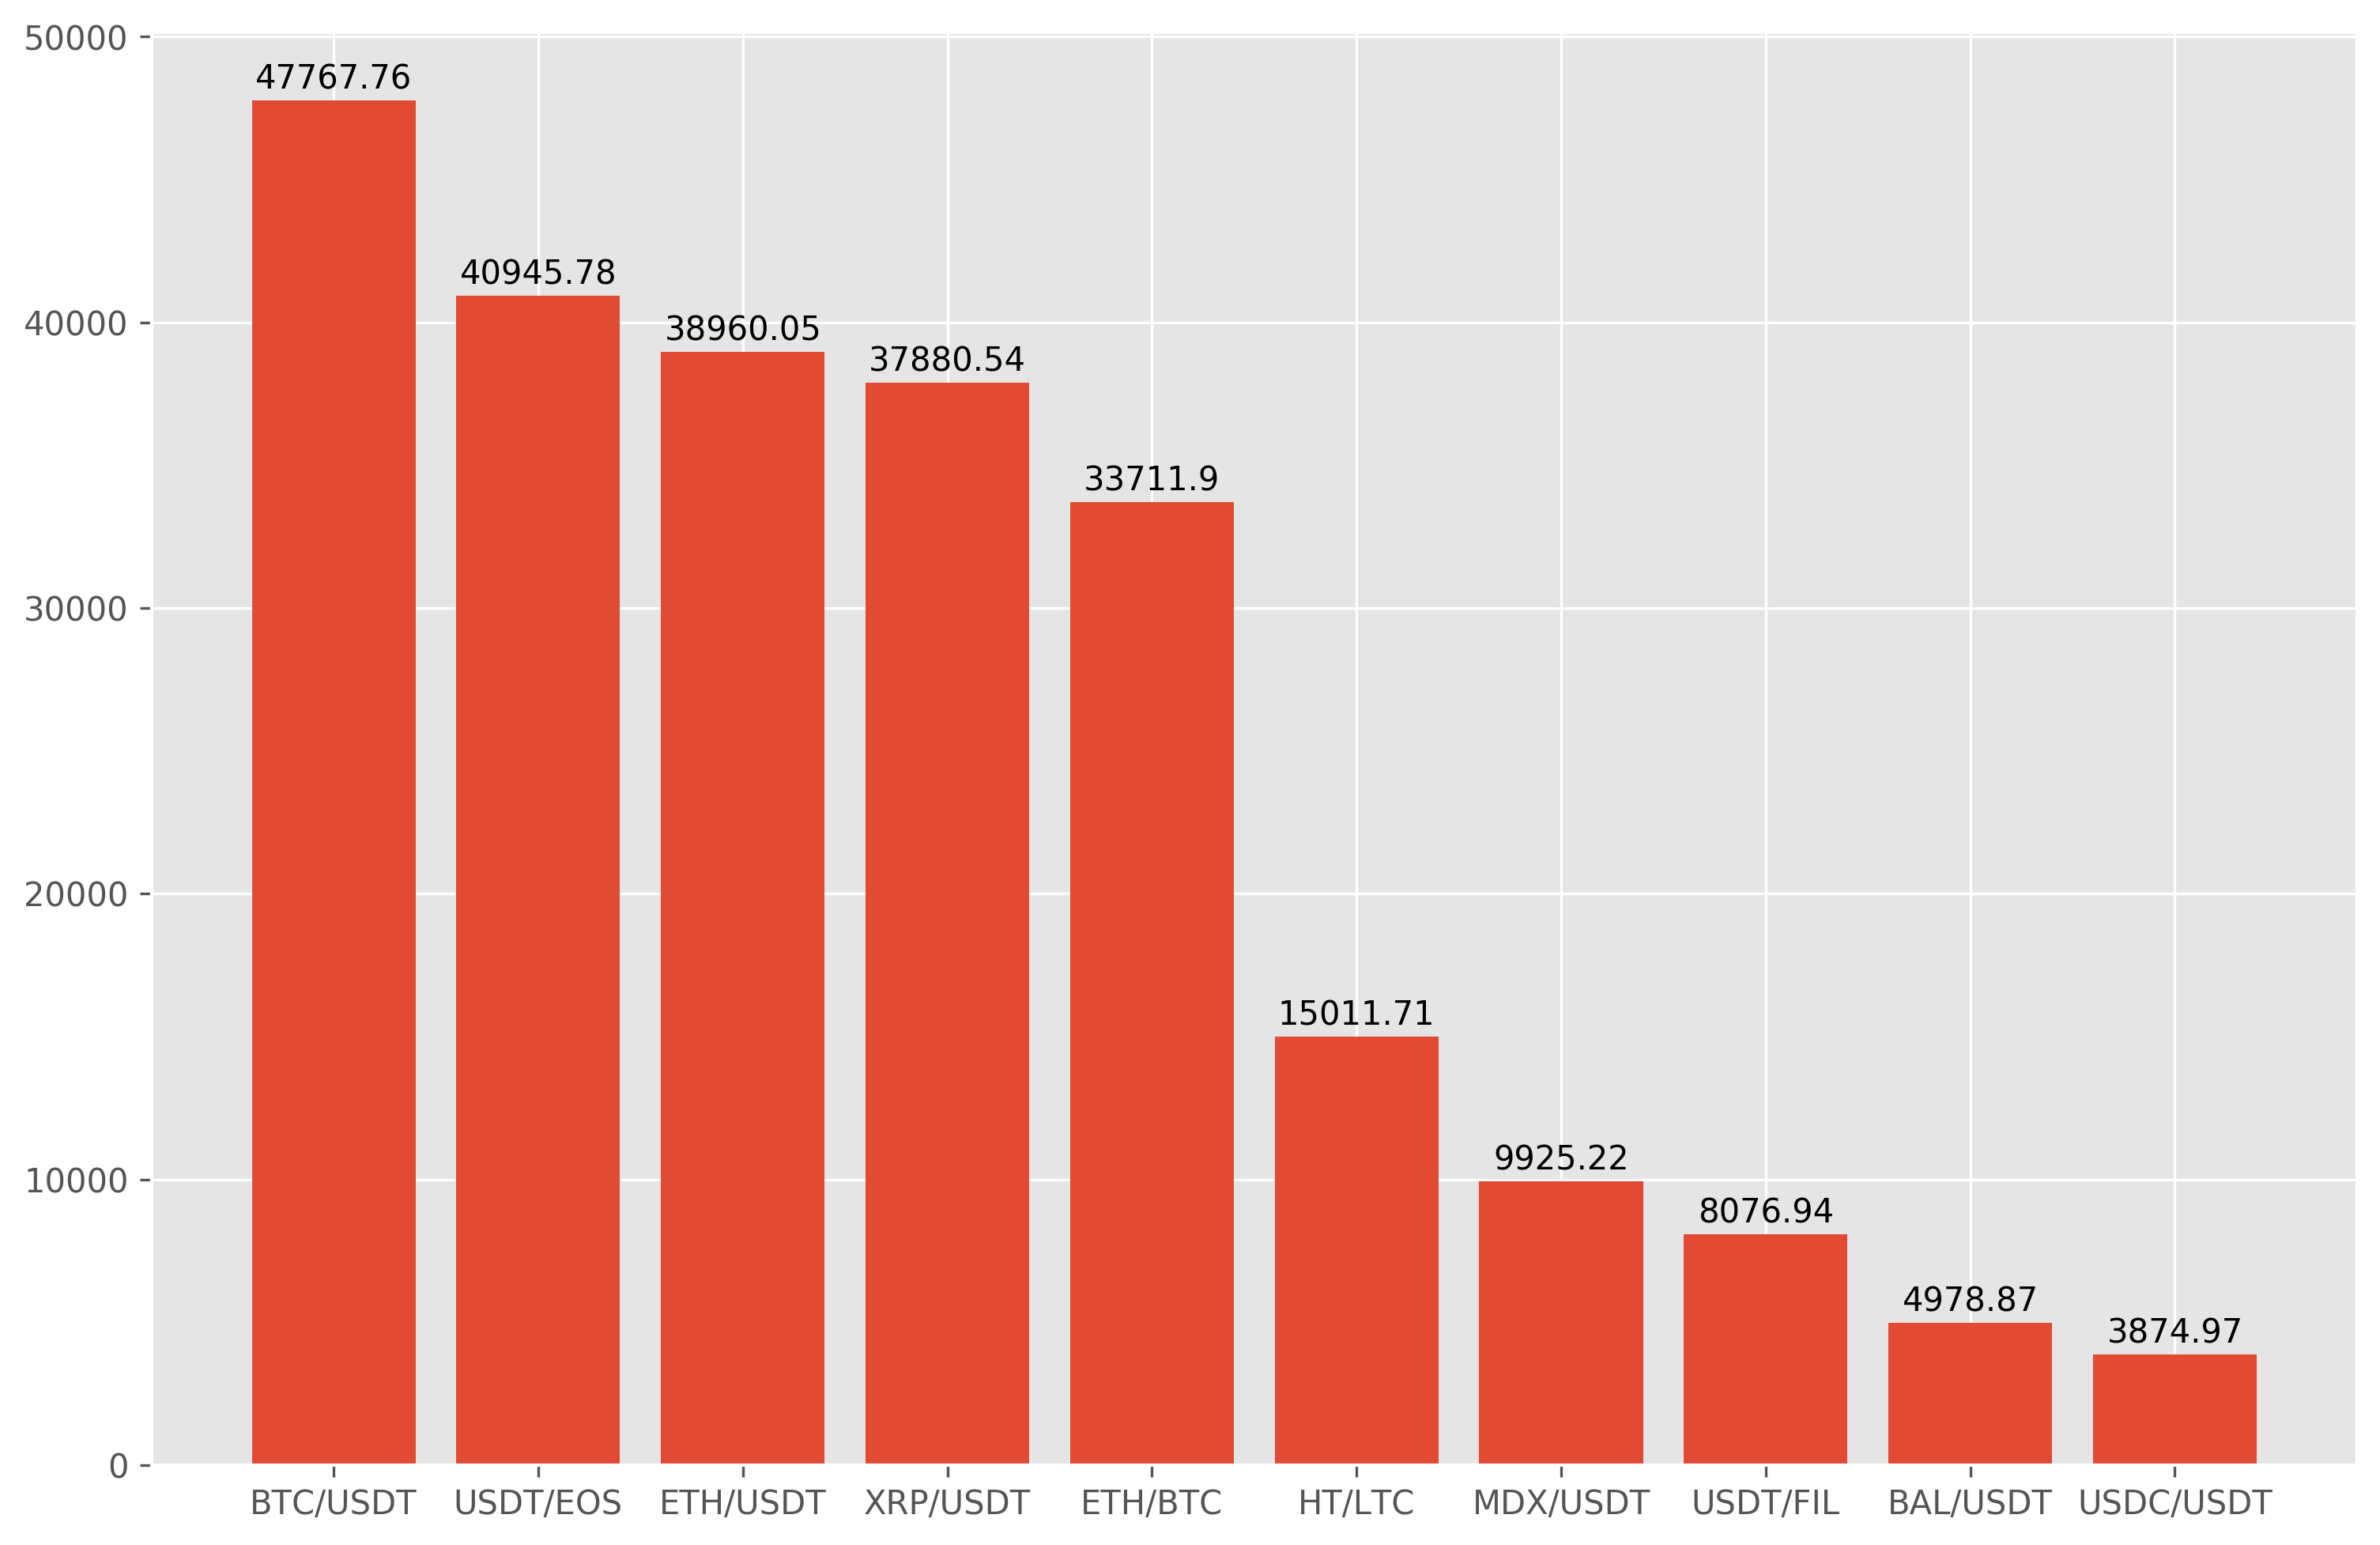

In [264]:
tmp = des.iloc[1:].sort_values("variance", ascending=False)
plt.figure(figsize=(12,8), dpi=300)
top_n = 10
X = np.arange(top_n)+1
symbols = tmp.index[:top_n]
n_transactions = tmp["variance"].iloc[:top_n].values
plt.bar(X, n_transactions)
plt.xticks(X, symbols)
for x, value in zip(X, n_transactions):
    plt.text(x, value+400, round(value, 2), ha='center')
plt.savefig("MDEX中GAS价格方差排名前10币对.jpg", bbox_inches="tight")

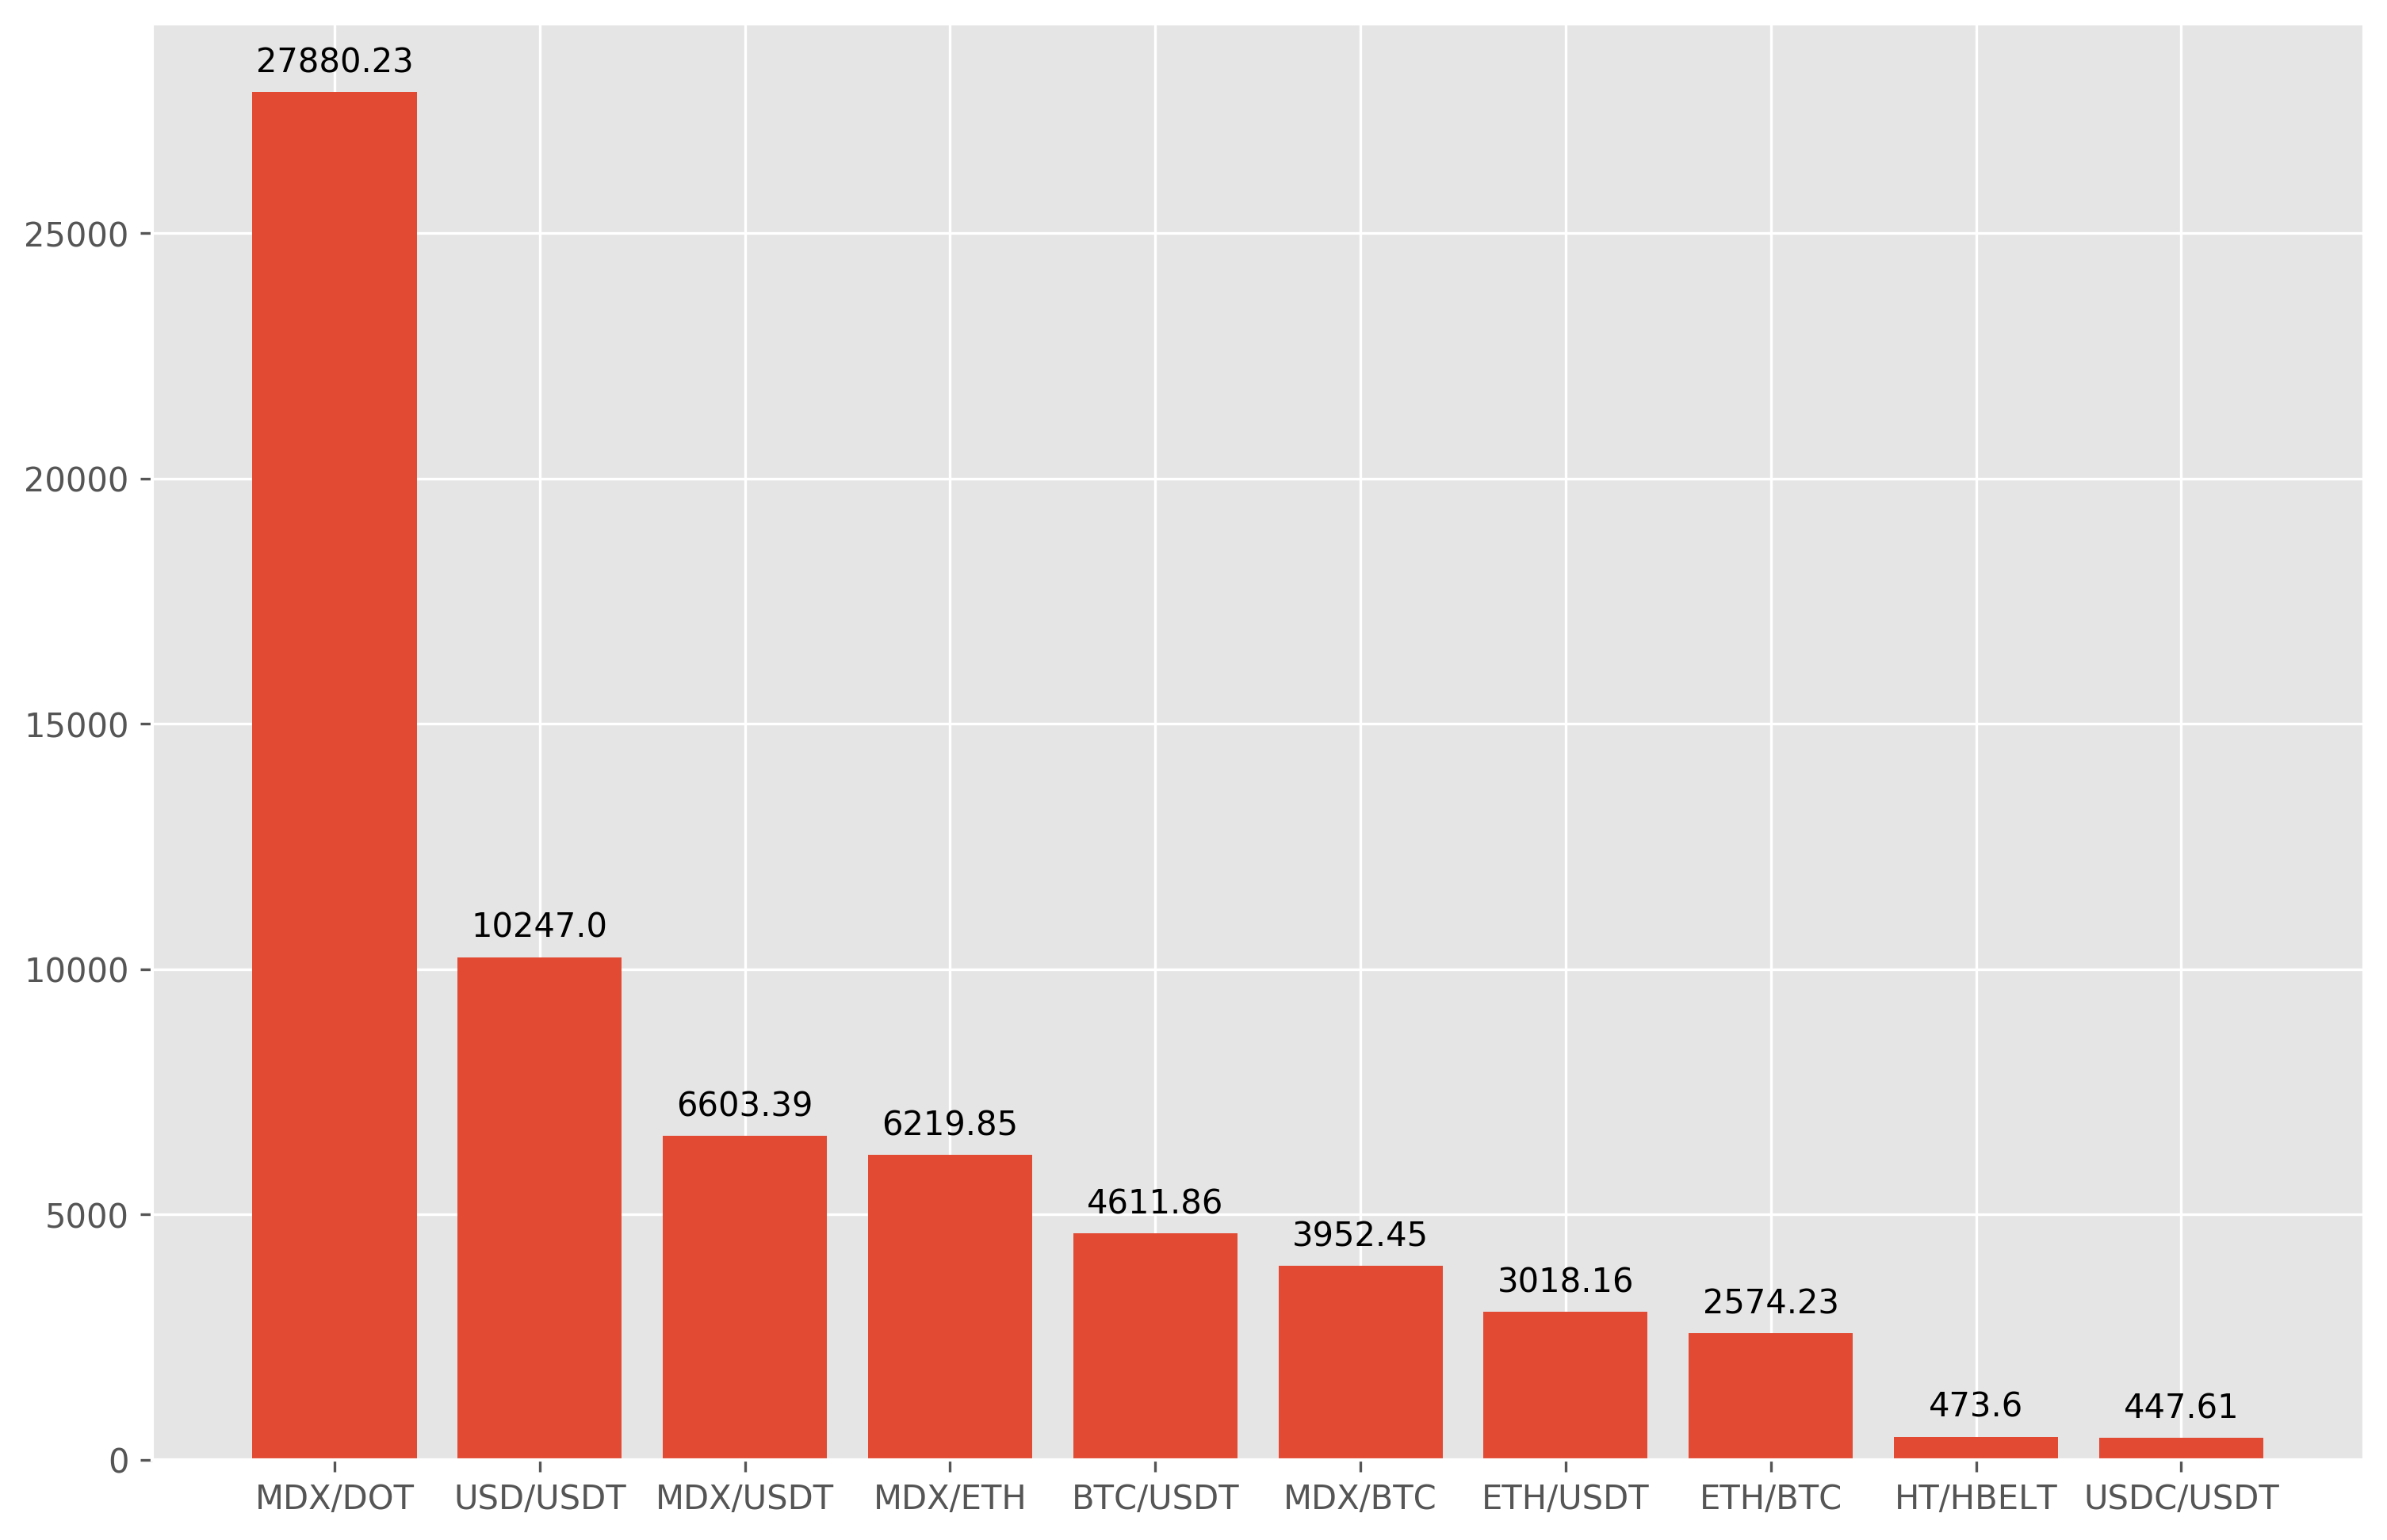

In [265]:
tmp = df.groupby("symbol").apply(lambda x:(x.transferred_value/x.transferred_number).mean())
tmp = tmp.sort_values(ascending=False)
plt.figure(figsize=(12,8), dpi=300)
top_n = 10
X = np.arange(top_n)+1
symbols = tmp.index[:top_n]
n_transactions = tmp.iloc[:top_n].values
plt.bar(X, n_transactions)
plt.xticks(X, symbols)
for x, value in zip(X, n_transactions):
    plt.text(x, value+400, round(value, 2), ha='center')
plt.savefig("平均单笔交易价值($)前10币对.jpg", bbox_inches="tight")

In [163]:
unverified_ratio = df.groupby("symbol")["can_abi"].apply(lambda x:1-x.sum()/x.count())
unverified_ratio.name = "unverified_ratio"

total_number = df.groupby("symbol")["can_abi"].count()
total_number.name = "total_number"

unverified_number = total_number-df.groupby("symbol")["can_abi"].sum()
unverified_number.name = "unverified_number"

unverified_info = pd.DataFrame([unverified_ratio, unverified_number, total_number]).T
unverified_info.to_csv("各币对加密合约统计.csv")

In [186]:
symbols_df = {}
for symbol in set(df.symbol):
    symbol_df = df[df.symbol == symbol]
    symbol_df = symbol_df.sort_values(["block_number", "gas_price"],
                          ascending=False).drop_duplicates("block_number",
                                                           keep="first")

In [270]:
btc_df = df[df.symbol == "BTC/USDT"]
btc_df = btc_df.sort_values(["block_number", "gas_price"],
                      ascending=False).drop_duplicates("block_number",
                                                       keep="first")

In [286]:
aa = (btc_df.transferred_value/btc_df.transferred_number).values
aa[~np.isfinite(aa)] = 0

In [287]:
np.corrcoef(aa, btc_df.gas_price)

array([[1.        , 0.01595049],
       [0.01595049, 1.        ]])

In [276]:
btc_df["gas_price"].mean()

63.720374887031895

In [269]:
btc_df.shape

(5645, 14)

In [235]:
n_same_transaction = btc_df.groupby("block_number")["block_number"].count()

In [236]:
for _ in eth_df.index:
    block_number = btc_df.loc[_, "block_number"]
    btc_df.loc[_, "n_same_transaction"] = n_same_transaction.loc[block_number]

/usr/local/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/usr/local/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [238]:
np.corrcoef(eth_df.gas_price, eth_df.n_same_transaction)

array([[1.        , 0.01730812],
       [0.01730812, 1.        ]])

In [245]:
np.corrcoef(eth_df.gas_price, eth_df.n_same_transaction/eth_df.n_transaction)

array([[1.        , 0.01044326],
       [0.01044326, 1.        ]])

In [ ]:
model.t

In [253]:
model = LinearRegression()
model.fit(eth_df.transferred_value.values.reshape(-1, 1), eth_df.gas_price.values)
model.coef_[0]

1.1030590879416853e-05

In [199]:
np.corrcoef(eth_df.gas_price, eth_df.transferred_value)

array([[1.        , 0.01467484],
       [0.01467484, 1.        ]])

In [190]:
import time

In [192]:
time.time()

1634313564.9606988

In [189]:
symbol_df.gas_price.max()

1300.0

In [183]:
highest_gas_df = df.groupby("symbol").apply(
    lambda x: x.sort_values(["block_number", "gas_price"], ascending=False
                            ).drop_duplicates("block_number", keep="first"))
highest_gas_df

hash  \
symbol                                                                
AAVE/USDT 67      0x79e603d2be40ede07578eaee69ef5999f9a7a80a5e58...   
          90      0xaa49774e7526c8afc91cbf33d36e9443b4dc8ca5e9e8...   
          278     0xa9050c7d239cbbd5c6e0dae5a71f635c1c14917356cf...   
          299     0xf3c27e9cd8d64ee4f6f82c6fd374129e72ec7bbef9e6...   
          311     0x347e37520f38dd5f69a8d5487819f2b0e3b01b084106...   
...                                                             ...   
XRP/USDT  247319  0x3fa3329f3cf1e1ba11a54b27612aa32c2736ecfab91a...   
          248651  0x23773f43519ff578c0ff54f60047feaf1c24c75421a1...   
          248674  0x43a17236614121a1e0b0f482e5406dbf3906a73b1555...   
          248706  0x6807fdb6288beda9c1b7a22ecf29b0101e99e67524de...   
ZT/USDT   131651  0x8e34b45a99020bb6c6c744415c51aa97e9232aa4c746...   

                  block_number  n_transaction     timestamp  \
symbol                                                        
AAVE/USDT 67           8959212             30  1.633772e+12   
          90           8959206             28  1.633773e+12   
          278          8959108             59  1.633775e+12   
          299          8959104             51  1.633775e+12   
          311          8959101             34  1.633775e+12   
...                        ...            ...           ...   
XRP/USDT  247319       8525241             36  1.632622e+12   
          248651       8524591             49  1.632639e+12   
          248674       8524588             57  1.632639e+12   
          248706       8524584             39  1.632639e+12   
ZT/USDT   131651       8610513             24  1.633471e+12   

                                                               from  \
symbol                                                                
AAVE/USDT 67      0xaf24044b62d19206eced78c738dee0b2f553847e0xaf...   
          90      0xd177acfa99c046f5e2d06cc6aaecb00e6c7a933a0xd1...   
          278     0x64aa6f93e0e1f49ff4958990c40d4bf17dafc0eb0x64...   
          299     0xc193c11e75216da370e0f94f87b676dce3a7b9190xc1...   
          311     0x560983378c99394ab71ced1f7a55ca01de3d00860x56...   
...                                                             ...   
XRP/USDT  247319  0xaa3e34c024271c476a979fafc181aadb9d8ecffd0xaa...   
          248651  0xaa3e34c024271c476a979fafc181aadb9d8ecffd0xaa...   
          248674  0xaa3e34c024271c476a979fafc181aadb9d8ecffd0xaa...   
          248706  0xaa3e34c024271c476a979fafc181aadb9d8ecffd0xaa...   
ZT/USDT   131651  0xfc2c22de2ea9f4be4bf124b0ff00bac10d665eed0xfc...   

                                                                 to   status  \
symbol                                                                         
AAVE/USDT 67      0x2979f9c20f75891070f23f950700906551a560c60x29...  Success   
          90      0x2979f9c20f75891070f23f950700906551a560c60x29...  Success   
          278     0x2979f9c20f75891070f23f950700906551a560c60x29...  Success   
          299     0x2979f9c20f75891070f23f950700906551a560c60x29...  Success   
          311     0x2979f9c20f75891070f23f950700906551a560c60x29...  Success   
...                                                             ...      ...   
XRP/USDT  247319  0xed7d5f38c79115ca12fe6c0041abb22f0a06c3000xed...  Success   
          248651  0xed7d5f38c79115ca12fe6c0041abb22f0a06c3000xed...  Success   
          248674  0xed7d5f38c79115ca12fe6c0041abb22f0a06c3000xed...  Success   
          248706  0xed7d5f38c79115ca12fe6c0041abb22f0a06c3000xed...  Success   
ZT/USDT   131651  0x72e7831e70c4f59316bd70596d1875f49a3267980x72...  Success   

                  transferred_value  transferred_number  gas_limit  gas_used  \
symbol                                                                         
AAVE/USDT 67                 478.05                   3   380000.0    239209   
          90                 471.82                   3        NaN    256309   
          278                315.3

In [53]:
ht_gas.mean()

12.270738502427701

In [52]:
df.gas_price.mean()

17.034443048802057